In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
#Step 2: Load a 10% Sample of the Dataset
# Load a 10% random sample of the large JSON file in chunks
data = pd.read_json('/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json', lines=True, chunksize=100000)

# Concatenate a 10% sample from each chunk
sampled_data = pd.concat(chunk.sample(frac=0.1, random_state=42) for chunk in data)

# Display the first few rows and structure to understand the data
sampled_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
75721,WUXB1obE1-TbgOIvEifamQ,Home Decorators Collection,13913 Manchester Rd,Ballwin,MO,63011,38.598387,-90.488014,3.0,5,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Furniture Stores, Shopping, Home & Garden",None
80184,cuPS4i6nMiRHb_QH_YAgHg,Bank of America Financial Center,"625 W Dekalb Pike, Ste 100",King Of Prussia,PA,19406,40.087574,-75.382903,1.5,6,1,None,"Financial Services, Mortgage Brokers, Real Est...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
19864,6ymIJJ780dpKOyPJkhtDsg,Dunkin',2300 W Hillsborough Ave,Tampa,FL,33603,27.995463,-82.482568,2.5,9,1,"{'BusinessParking': '{'garage': False, 'street...","Donuts, Coffee & Tea, Food","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ..."
76699,q9m7CEQBF7YyquljJ__JzA,Wells Fargo Bank,195 N Fairview Ave,Goleta,CA,93117,34.442223,-119.831025,2.5,16,1,None,"Banks & Credit Unions, Financial Services","{'Monday': '9:30-17:0', 'Tuesday': '9:30-17:0'..."
92991,Af7NWqfoTszSyyuMRU6few,Starbucks,1600 Arch St,Philadelphia,PA,19103,39.954724,-75.166689,3.0,31,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '8:30-16:0', ..."


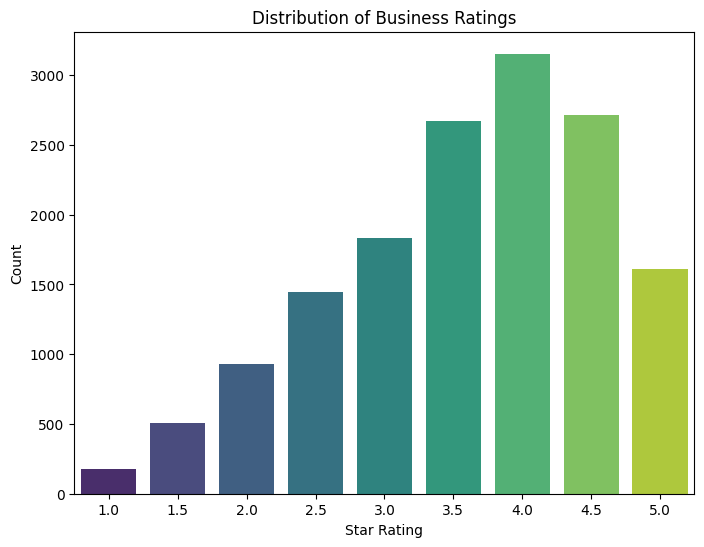

In [26]:
#Step 3: Data Overview and Initial Visualizations
# Plot distribution of review ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=sampled_data, x='stars', palette='viridis')
plt.title('Distribution of Business Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

In [27]:
# Step 4: Text Preprocessing
# Define a function to clean and preprocess the text data in the 'categories' column
def preprocess_text(text):
    if pd.isnull(text):  # Handle any missing categories
        return ""
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Apply the preprocessing function to the `categories` column
sampled_data['cleaned_text'] = sampled_data['categories'].apply(preprocess_text)

In [28]:
# Step 5: Split the Dataset
# Separate features and target
X = sampled_data['cleaned_text']
y = sampled_data['stars'].round().astype(int) 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Step 6: Vectorization
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data; transform the testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
# Step 7: Train the Model
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Step 8: Make Predictions
# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

In [32]:
# Step 9: Evaluate the Mode
# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00        34
           2       0.49      0.34      0.40       562
           3       0.40      0.01      0.01       368
           4       0.63      0.93      0.75      1738
           5       0.57      0.11      0.19       305

    accuracy                           0.61      3007
   macro avg       0.62      0.28      0.27      3007
weighted avg       0.58      0.61      0.53      3007



In [33]:
# Check Class Distribution
# Checking the class distribution in actual and predicted labels
print("Actual class distribution in y_test:\n", y_test.value_counts())
print("Predicted class distribution in y_pred:\n", pd.Series(y_pred).value_counts())

Actual class distribution in y_test:
 stars
4    1738
2     562
3     368
5     305
1      34
Name: count, dtype: int64
Predicted class distribution in y_pred:
 4    2553
2     388
5      61
3       5
Name: count, dtype: int64


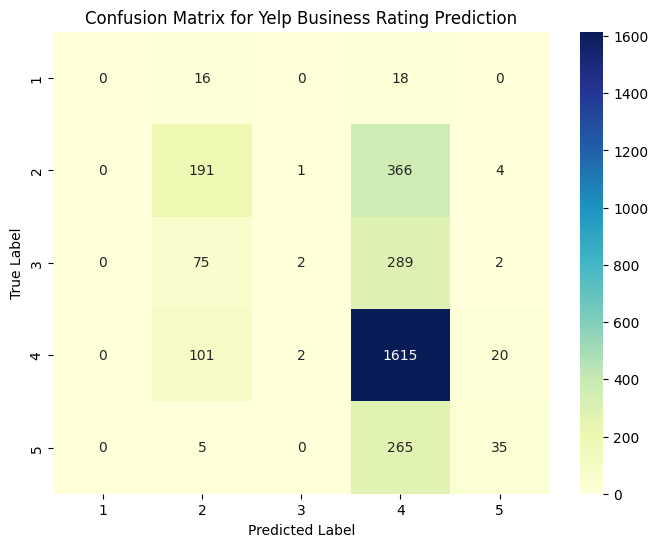

In [34]:
# Step 10: Visualization of Model Performance 
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix for Yelp Business Rating Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()